In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers

from sklearn.metrics import classification_report, confusion_matrix

### 1. Load data

In [3]:
data = tf.keras.utils.image_dataset_from_directory('data/')

Found 2041 files belonging to 2 classes.


In [4]:
data.class_names

['fake', 'real']

### 2. Visualize the data

In [5]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

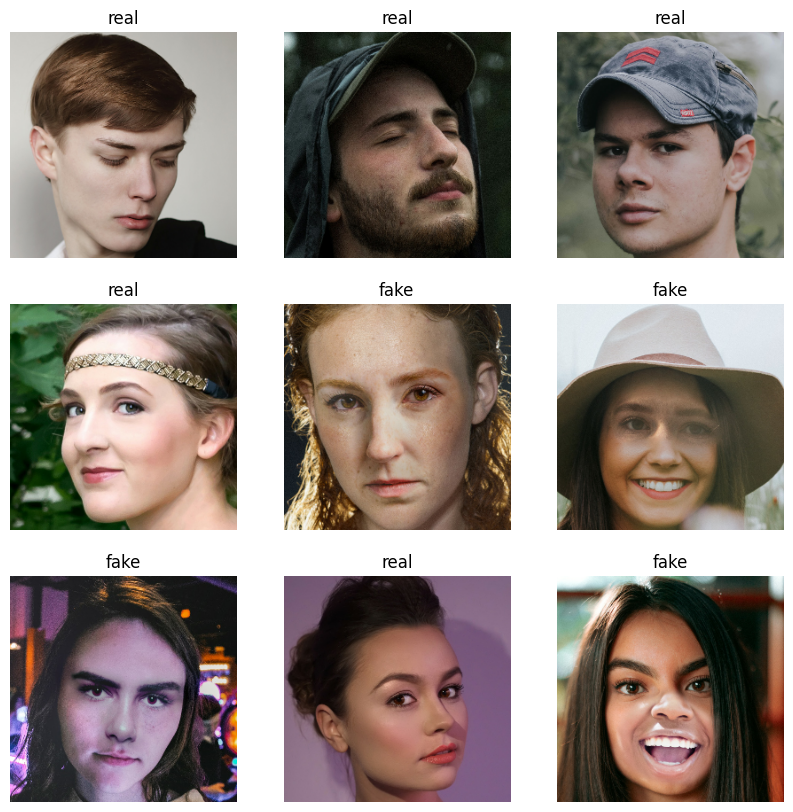

In [6]:
plt.figure(figsize=(10, 10))
for image, label in data.take(3):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data.class_names[label[i]])
        plt.axis('off')

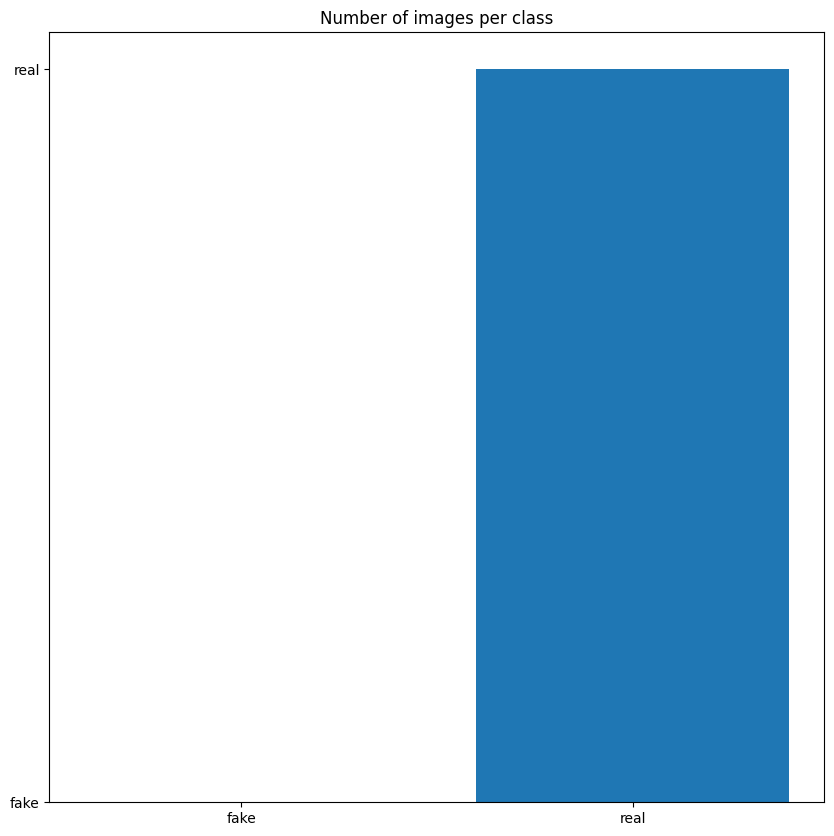

In [14]:
# Plot histogram of count of images per class
plt.figure(figsize=(10, 10))
plt.bar(data.class_names, data.class_names)
plt.title('Number of images per class')
plt.show()


### 3. Normalize the data

In [6]:
normalized_data = data.map(lambda x, y: (x / 255.0, y))
normalized_data.as_numpy_iterator().next()[0][0][0]

array([[0.9843137 , 0.9882353 , 0.96862745],
       [0.9843137 , 0.9882353 , 0.96862745],
       [0.9843137 , 0.9882353 , 0.96862745],
       [0.9870711 , 0.99099267, 0.9713848 ],
       [0.9843137 , 0.9882353 , 0.96862745],
       [0.9843137 , 0.9882353 , 0.96862745],
       [0.9882353 , 0.99215686, 0.972549  ],
       [0.9843137 , 0.9882353 , 0.96862745],
       [0.9843137 , 0.9882353 , 0.96862745],
       [0.9843137 , 0.9882353 , 0.96862745],
       [0.9856005 , 0.98952204, 0.9699142 ],
       [0.9856005 , 0.98952204, 0.9699142 ],
       [0.9856005 , 0.98952204, 0.9699142 ],
       [0.9854195 , 0.9893411 , 0.96973324],
       [0.9843137 , 0.9882353 , 0.96862745],
       [0.9843137 , 0.9882353 , 0.96862745],
       [0.9843137 , 0.9882353 , 0.96862745],
       [0.9816684 , 0.9816684 , 0.9738253 ],
       [0.98039216, 0.98039216, 0.972549  ],
       [0.98039216, 0.98039216, 0.972549  ],
       [0.98088235, 0.983027  , 0.96875   ],
       [0.9838848 , 0.9878064 , 0.96819854],
       [0.

### 4. Split data into train and validation sets

In [7]:
train_size = int(0.8 * len(data))
val_size = int(0.2 * len(data))

In [8]:
train_set = normalized_data.take(train_size)
val_set = normalized_data.skip(train_size).take(val_size)

### 5. Training Models

### 5.1 Convolutional Neural Network

In [9]:
model = Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [11]:
def train_model(model):
    model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

    history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=10
    )

    print(f"History: \n{history}")

    val_loss, val_accuracy = model.evaluate(val_set)
    print(f"Validation accuracy: {val_accuracy}")   

In [12]:
train_model(model)

Epoch 1/10
51/51 [==============================] - 19s 355ms/step - loss: 0.7551 - accuracy: 0.5343 - val_loss: 0.6900 - val_accuracy: 0.5339
Epoch 2/10
51/51 [==============================] - 18s 352ms/step - loss: 0.6763 - accuracy: 0.5790 - val_loss: 0.6819 - val_accuracy: 0.5495
Epoch 3/10
51/51 [==============================] - 19s 362ms/step - loss: 0.6660 - accuracy: 0.5974 - val_loss: 0.6555 - val_accuracy: 0.5859
Epoch 4/10
51/51 [==============================] - 20s 375ms/step - loss: 0.6369 - accuracy: 0.6324 - val_loss: 0.6711 - val_accuracy: 0.6016
Epoch 5/10
51/51 [==============================] - 20s 385ms/step - loss: 0.5964 - accuracy: 0.6759 - val_loss: 0.6423 - val_accuracy: 0.6510
Epoch 6/10
51/51 [==============================] - 21s 392ms/step - loss: 0.5464 - accuracy: 0.7237 - val_loss: 0.6352 - val_accuracy: 0.6484
Epoch 7/10
51/51 [==============================] - 21s 398ms/step - loss: 0.4872 - accuracy: 0.7561 - val_loss: 0.6748 - val_accuracy: 0.6510

#### 5.2 Predictions from the model

In [13]:
predictions = model.predict(val_set, verbose = 1)
predictions = np.round(predictions).astype(int).reshape(-1)
predictions

12/12 [==============================] - 4s 98ms/step


array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [14]:
true_labels = []
for image, label in val_set:
    for i in range(len(label)):
        true_labels.append(label[i].numpy().astype(int))

print(f"Classification report : \n {classification_report(predictions, true_labels)}")

Classification report : 
               precision    recall  f1-score   support

           0       0.63      0.49      0.55       237
           1       0.39      0.54      0.45       147

    accuracy                           0.51       384
   macro avg       0.51      0.51      0.50       384
weighted avg       0.54      0.51      0.51       384



In [15]:
validation_set = data.skip(train_size).take(val_size)

In [16]:
def display_predictions(predictions):
    
    
    plt.figure(figsize=(10, 10))
    for image, label in validation_set:
        # print 9 validation set images with predicted and true labels
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(image[i].numpy().astype('uint8'))
            # map predicted label to class name
            plt.title(f'Predicted: {data.class_names[predictions[i]]}, True : {data.class_names[label[i]]}')
            plt.axis('off')

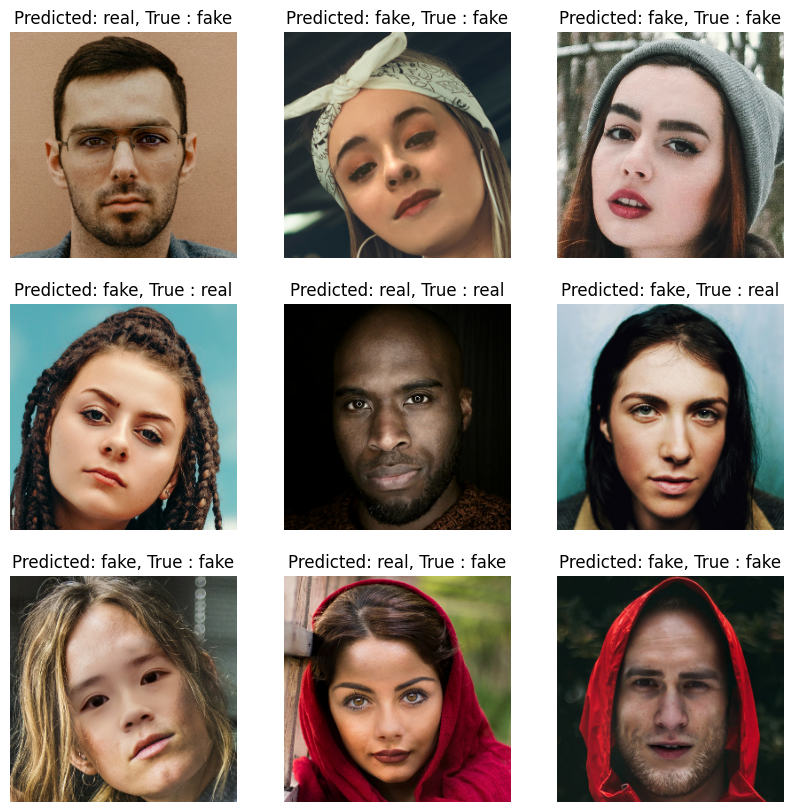

In [17]:
display_predictions(predictions)

### 5.3 Addition of layers to tune the model

In [18]:
model = Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [19]:
train_model(model)

Epoch 1/10
51/51 [==============================] - 387s 8s/step - loss: 0.7146 - accuracy: 0.5380 - val_loss: 0.6925 - val_accuracy: 0.5182
Epoch 2/10
51/51 [==============================] - 678s 13s/step - loss: 0.6921 - accuracy: 0.5319 - val_loss: 0.6941 - val_accuracy: 0.5052
Epoch 3/10
51/51 [==============================] - 413s 8s/step - loss: 0.6920 - accuracy: 0.5312 - val_loss: 0.6946 - val_accuracy: 0.4870
Epoch 4/10
51/51 [==============================] - 430s 8s/step - loss: 0.6917 - accuracy: 0.5331 - val_loss: 0.6938 - val_accuracy: 0.5052
Epoch 5/10
51/51 [==============================] - 419s 8s/step - loss: 0.6910 - accuracy: 0.5343 - val_loss: 0.6959 - val_accuracy: 0.4948
Epoch 6/10
51/51 [==============================] - 444s 9s/step - loss: 0.6908 - accuracy: 0.5362 - val_loss: 0.6898 - val_accuracy: 0.5417
Epoch 7/10
51/51 [==============================] - 461s 9s/step - loss: 0.6914 - accuracy: 0.5319 - val_loss: 0.6935 - val_accuracy: 0.5104
Epoch 8/10
5

Increasing the convolutional layers did not improve the performance of the model. The 3 convolutional layered model has the best performance for identifying the fake and real images.